In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Embarked'].fillna('S', inplace = True)
data['Fare'].fillna(0, inplace=True)
data['Fare'] = data['Fare'].map(lambda x : np.log(x) if x > 0 else 0)

In [4]:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)
mapping = {
    "Mr":0,
    "Miss":1,
    "Mrs" : 1,
    "Master":2,
    "Other":3
}

data['Initial'] = data['Initial'].map(mapping)

In [5]:
mapping_sex = {
    'male' : 0,
    'female': 1
}

mapping_em = {
    'S' :0,
    'C' :1,
    'Q' :2
}


data['Sex'] = data['Sex'].map(mapping_sex)
data['Embarked'] = data['Embarked'].map(mapping_em)


data.drop(['PassengerId', "Ticket", "Cabin", "Name"], axis = 1, inplace = True)

In [6]:
data.groupby('Initial')['Age'].mean()

Initial
0    32.739609
1    27.834615
2     4.574167
3    45.888889
Name: Age, dtype: float64

In [7]:
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 0), 'Age' ] = 32
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 1), 'Age' ] = 28
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 2), 'Age' ] = 5
data.loc[ (data['Age'].isnull()) & (data['Initial'] == 3), 'Age' ] = 45

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,1.981001,0,0
1,1,1,1,38.0,1,0,4.266662,1,1
2,1,3,1,26.0,0,0,2.070022,0,1
3,1,1,1,35.0,1,0,3.972177,0,1
4,0,3,0,35.0,0,0,2.085672,0,0


In [9]:
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [11]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
pred = rf.predict(X_test)
print("정확도 :{0:.3f}".format(accuracy_score(y_test, pred)))

정확도 :0.832


In [13]:
gb_param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 10],
    'min_samples_split' : [2, 3, 5, 10]
}

### GradientBoostingClassifier를 이용해서 모델을 만들었음

In [14]:
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [15]:
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, scoring="accuracy", n_jobs= -1, verbose = 1)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [16]:
gb_grid.best_score_

0.8272234807446074

### 분류가 되면서 이 값으로 모델을 만들 수 가 있다

In [17]:
gb_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

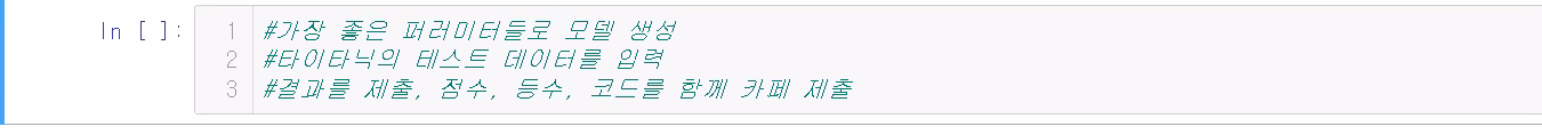

# 신용카드 데이터

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


train_test_split(card_df[:,:-1])

In [22]:
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
x_features=card_df.iloc[:,:-1] #x, 284807 rows × 30 columns
y_target=card_df.iloc[:,-1] #y, Length: 284807

In [24]:
xtrain, xtest, ytrain, ytest=train_test_split(x_features, y_target, 
                 test_size=0.3, random_state=20231023)

In [25]:
ytrain

218489    0
56731     0
227772    0
86066     0
17        0
         ..
65529     0
125641    0
152463    0
148223    0
203495    0
Name: Class, Length: 199364, dtype: int64

In [26]:
ytrain.value_counts()

0    199028
1       336
Name: Class, dtype: int64

In [27]:
ytest

131531    0
20779     0
277305    0
257906    0
109734    0
         ..
251127    0
95297     0
35172     0
73670     0
35329     0
Name: Class, Length: 85443, dtype: int64

In [28]:
ytest.value_counts()

0    85287
1      156
Name: Class, dtype: int64

### stratify = 층화추출
### test_size=0.3, 데이터가 7대3으로 나누어짐 

In [29]:
xtrain, xtest, ytrain, ytest=train_test_split(x_features, y_target, 
                 test_size=0.3, random_state=20231023,stratify=y_target)

In [30]:
ytrain.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [31]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [32]:
"""
time을 제거하고 제거된 것이 return을 통해 적용됨
"""


'\ntime을 제거하고 제거된 것이 return을 통해 적용됨\n'

In [33]:
df_copy=get_preprocessed_df(card_df)

In [34]:
df_copy

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [35]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [36]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
211605,-8.367621,7.402969,-5.114191,-2.966792,-0.985904,-1.660018,0.397816,1.008250,5.290976,9.315735,...,3.589299,-0.557927,0.349087,0.301734,0.662330,1.145939,-0.012273,1.513736,0.669504,0.69
231628,-1.290662,0.764452,-0.169233,-1.688528,1.984718,-0.717210,1.667635,-0.228295,-0.959071,-0.679429,...,0.057620,0.138615,0.390374,-0.678774,0.292254,1.425865,0.265341,0.051405,0.103879,55.47
110643,-0.606860,0.233923,2.633361,-0.155762,-0.328850,-0.070593,0.173023,0.113394,0.680147,-0.686651,...,-0.129287,0.007393,0.265045,-0.040615,0.406088,-0.498823,0.121851,-0.046840,-0.087259,11.50
11478,1.374168,-0.330389,0.812971,-0.183112,-1.074771,-0.933788,-0.544238,-0.348237,0.614925,0.080408,...,0.078163,-0.134742,0.016793,0.002610,0.714527,0.536175,-0.307487,-0.003555,0.013024,10.00
243724,-2.146505,-7.603113,-4.928224,1.449173,-2.083871,-0.984759,3.629816,-1.302973,-1.434148,-0.021909,...,4.009181,1.274986,-0.857670,-2.109682,0.169338,-0.322888,0.777822,-0.552258,0.304777,2290.05


In [37]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
170978,0.101337,0.665808,-0.514168,-0.675752,1.087999,-0.681790,0.877323,-0.096356,0.265313,-1.297842,...,-0.177718,0.114197,0.500593,-0.066669,0.558720,-0.518068,0.367070,0.079707,0.131678,12.50
96185,-1.678212,1.244794,0.947874,-2.101099,-0.811015,-1.037444,0.144664,0.465090,-1.137320,0.847260,...,-0.246449,-0.383548,-0.581462,0.033139,0.483823,-0.039289,0.078483,0.486383,0.291222,10.00
30469,-1.407998,-0.094725,1.218361,-1.884626,0.639017,-1.127801,0.537467,-0.295973,-1.670308,0.022252,...,-0.126990,0.295294,0.836930,-0.367286,0.157457,0.840789,-0.160280,-0.210861,0.103780,29.95
266925,2.025163,-1.001783,-0.855068,-0.506527,-0.793876,-0.197866,-0.779789,0.032557,-0.357041,1.015046,...,-0.519001,-0.298900,-0.427423,0.298094,0.747735,-0.426508,0.500501,-0.051892,-0.048338,50.27
14185,0.477071,-1.295023,0.586617,1.599474,-1.215659,0.114858,-0.178181,0.090062,0.944582,-0.207109,...,0.543494,0.299761,0.114989,-0.461395,-0.122341,0.381628,-0.245921,-0.013775,0.092648,380.00


In [38]:
y_train.head()

211605    0
231628    0
110643    0
11478     0
243724    0
Name: Class, dtype: int64

In [39]:
y_test.head()

170978    0
96185     0
30469     0
266925    0
14185     0
Name: Class, dtype: int64

In [40]:
X_train.shape

(199364, 29)

In [41]:
y_train.shape

(199364,)

In [42]:
print(y_train.value_counts()/y_train.shape[0] * 100)

0    99.827451
1     0.172549
Name: Class, dtype: float64


In [43]:
print(y_test.value_counts()/y_test.shape[0] * 100)

0    99.826785
1     0.173215
Name: Class, dtype: float64


### 로지스틱회기 모델 이용해서 예측모델 만들기

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr_clf = LogisticRegression()

In [46]:
lr_clf.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
pd.Series(lr_clf.predict(X_test)).value_counts()

0    85347
1       96
dtype: int64

### predict_proba : 확률로 출력해주는 함수

In [49]:
lr_clf.predict_proba(X_test)

array([[9.98566902e-01, 1.43309815e-03],
       [9.99887606e-01, 1.12394032e-04],
       [9.99860902e-01, 1.39098315e-04],
       ...,
       [9.99770095e-01, 2.29904646e-04],
       [9.99186684e-01, 8.13315621e-04],
       [9.99919105e-01, 8.08954734e-05]])

In [50]:
lr_clf.predict_proba(X_test)[:,1]

array([1.43309815e-03, 1.12394032e-04, 1.39098315e-04, ...,
       2.29904646e-04, 8.13315621e-04, 8.08954734e-05])

# 2023-10-24
### lightgbm 설치

In [51]:
pip install lightgbm

                                              0.0/1.3 MB ? eta -:--:--
     ------                                   0.2/1.3 MB 6.1 MB/s eta 0:00:01
     ------------                             0.4/1.3 MB 6.3 MB/s eta 0:00:01
     -------------------                      0.7/1.3 MB 5.2 MB/s eta 0:00:01
     --------------------------               0.9/1.3 MB 5.1 MB/s eta 0:00:01
     ------------------------------------     1.2/1.3 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
from lightgbm import LGBMClassifier

### 데이터가 불균형하게 분포되어 있을때 boost_from_average=False

In [53]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, boost_from_average=False)
lgbm_clf

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

In [54]:
lgbm_clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

In [55]:
pred=lgbm_clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
lgbm_clf.predict_proba(X_test)

array([[9.99999997e-01, 3.49830240e-09],
       [1.00000000e+00, 1.08517297e-10],
       [1.00000000e+00, 2.23232317e-10],
       ...,
       [9.99999996e-01, 3.66393546e-09],
       [9.99999999e-01, 6.63996306e-10],
       [1.00000000e+00, 1.08138237e-10]])

# 이상치 범위 확인

In [57]:
import numpy as np

In [58]:
# 이상치 제거
q25=np.percentile(X_train["V1"].values,25)
q75=np.percentile(X_train["V1"].values,75)
iqr=q75-q25
iqr15=iqr*1.5
# 표준화
# 이 두방식을 통해 우수한 모델을 구할 수 있음

In [59]:
lowest_val=q25-iqr15#하안 바운드리
highest_val=q75+iqr15#상한 바운드리
# 이 경계를 벗어나면 이상치

In [60]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,0.000386,-0.000637,0.000587,-0.001239,0.000596,0.000806,-0.000127,0.001900,0.000387,-0.000203,...,0.000546,0.001181,0.000770,-0.000907,0.000708,0.000160,-0.001173,-0.000476,0.000252,88.286313
std,1.959976,1.658734,1.512912,1.413217,1.362707,1.322962,1.216585,1.191216,1.098032,1.086637,...,0.774205,0.736703,0.724805,0.630090,0.605543,0.520830,0.482453,0.401370,0.330830,248.033917
min,-56.407510,-72.715728,-32.965346,-5.683171,-35.182120,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000
25%,-0.921490,-0.598848,-0.889918,-0.849806,-0.690631,-0.767513,-0.556268,-0.207917,-0.642713,-0.535148,...,-0.211459,-0.227817,-0.540206,-0.162056,-0.353481,-0.317180,-0.328089,-0.070961,-0.053200,5.640000
50%,0.015893,0.065727,0.180635,-0.019842,-0.054758,-0.273142,0.040109,0.023008,-0.050546,-0.091521,...,-0.062514,-0.028990,0.007585,-0.011301,0.041293,0.016244,-0.053516,0.001207,0.011043,22.000000
75%,1.316633,0.804333,1.028314,0.744065,0.609794,0.400874,0.570132,0.327720,0.597585,0.456096,...,0.133886,0.186863,0.529286,0.147035,0.440205,0.351141,0.240123,0.090888,0.078216,77.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,21.550496,36.877368,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000


### 경계선으로 이상치 확인하는법

In [61]:
X_train["V1"][X_train["V1"]<lowest_val]

211605    -8.367621
151631    -7.824182
76190     -6.078681
207772    -7.794335
220170    -5.121007
            ...    
125442    -8.836906
264145    -4.692089
216442   -16.536406
20260    -10.648382
19760    -14.191832
Name: V1, Length: 4928, dtype: float64

In [62]:
X_train["V1"][X_train["V1"]>highest_val]  #이상치 없음

Series([], Name: V1, dtype: float64)

In [63]:
X_train["V1"][(X_train["V1"]<lowest_val)|(X_train["V1"]>highest_val)]

211605    -8.367621
151631    -7.824182
76190     -6.078681
207772    -7.794335
220170    -5.121007
            ...    
125442    -8.836906
264145    -4.692089
216442   -16.536406
20260    -10.648382
19760    -14.191832
Name: V1, Length: 4928, dtype: float64

In [64]:
X_train["V1"][(X_train["V1"]<lowest_val)|(X_train["V1"]>highest_val)].index

Int64Index([211605, 151631,  76190, 207772, 220170, 109519, 166031, 283347,
             18527, 259701,
            ...
            222507,  72745,  20946,  77564, 169338, 125442, 264145, 216442,
             20260,  19760],
           dtype='int64', length=4928)

# SMOTE 오버샘플링

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=0)
smote

In [ ]:
X_train_over, y_train_over=smote.fit_resample(X_train,y_train)

In [ ]:
X_train.shape

In [ ]:
X_train_over.shape

In [ ]:
pd.Series(y_train_over).value_counts()

In [ ]:
lr_clf=LogisticRegression()

In [ ]:
lr_clf.fit(X_train_over,y_train_over)

In [ ]:
lr_clf.predict(X_test)

In [ ]:
johnson=LGBMClassifier()

In [ ]:
johnson.fit(X_train_over,y_train_over)

In [ ]:
johnson.predict(X_test)